In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
import statsmodels  as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from typing import Literal
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.multicomp as multi
import seaborn as sns
import statsmodels as sm
from statsmodels.stats.anova import anova_lm

# **Affect of treatment On PH**

# Affect Of Depth on PH

In [4]:
df=pd.read_excel('Time Series.xlsx','2019 PCFS Time Series')

In [5]:
df

,Rep,Trt,Depth,WW19,SW19,WW20,SW20
0,1,1,0-3,4.15,4.65,4.76,NaN
1,2,1,0-3,4.20,4.48,4.55,4.80
2,3,1,0-3,4.38,4.37,4.47,4.58
3,4,1,0-3,4.37,4.55,4.64,4.72
4,1,1,3-6,4.33,4.49,4.56,4.52
...,...,...,...,...,...,...,...
103,4,9,3-6,4.49,4.95,5.06,4.74
104,1,9,6-12,4.85,5.02,5.24,5.53
105,2,9,6-12,4.85,5.04,5.17,5.02
106,3,9,6-12,4.73,4.66,4.72,4.80


# Data Visualization

**1.Scatter plot**

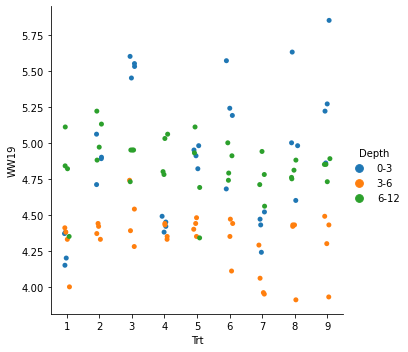

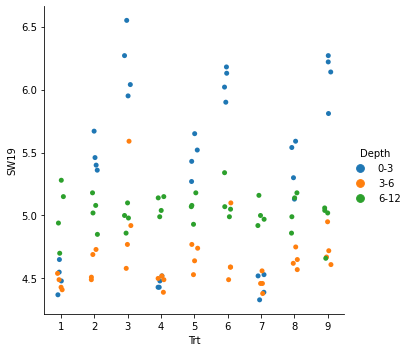

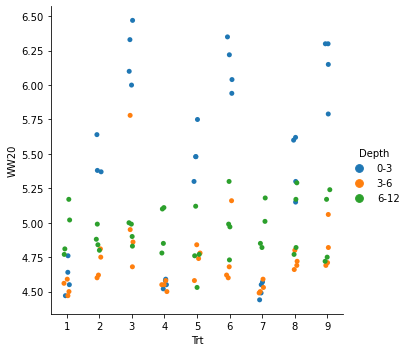

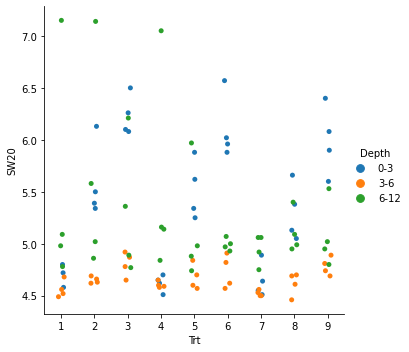

In [6]:
f1=sns.catplot(x='Trt',y='WW19',hue='Depth',data=df)
f2=sns.catplot(x='Trt',y='SW19',hue='Depth',data=df)
f3=sns.catplot(x='Trt',y='WW20',hue='Depth',data=df)
f4=sns.catplot(x='Trt',y='SW20',hue='Depth',data=df)
plt.show()

**BOX Plot**

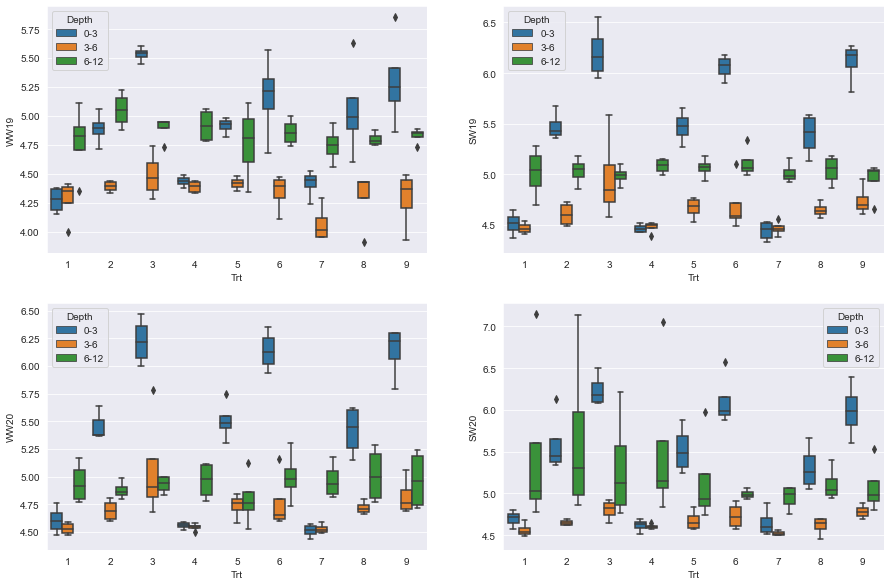

In [8]:
sns.set_palette('tab10')  
f , axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
sns.set_style("darkgrid")
f1=sns.boxplot(x='Trt',y='WW19',hue='Depth',data=df, ax=axes[0,0])
f2=sns.boxplot(x='Trt',y='SW19',hue='Depth',data=df,ax=axes[0,1])
f3=sns.boxplot(x='Trt',y='WW20',hue='Depth',data=df,ax=axes[1,0])
f4=sns.boxplot(x='Trt',y='SW20',hue='Depth',data=df,ax=axes[1,1])
plt.show()

Box plot visualize how the mean distribution is distributed.

**MANOVA TABLE**

In [9]:
maov = MANOVA.from_formula('WW19 + SW19 + WW20 + SW20 ~ Depth + Trt + Trt:Depth',data = df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0585 4.0000 97.0000 390.5268 0.0000
         Pillai's trace  0.9415 4.0000 97.0000 390.5268 0.0000
 Hotelling-Lawley trace 16.1042 4.0000 97.0000 390.5268 0.0000
    Roy's greatest root 16.1042 4.0000 97.0000 390.5268 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          Depth          Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.7081 8.0000 194.0000  4.5684 0.0000
          Pillai's trace 0.2994 8.0000 196.0000  4.3127 0.0001
  Hotelling

The different names given to each row (namely, Pillai's Trace, Wilks' Lambda, Hotelling's Trace and Roy's Largest Root) are the names of the different multivariate test statistics that can be used to test the statistical significance of the different effects of the independent variables. The most commonly recommended multivariate statistic to use is Wilks' Lambda (Λ).

DEPTH: 

We can see that p = .000 (i.e., the Wilks' Lambda in Depth) Indicates that Depth significantly affects the combined DV (WW19,SW19,WW20 and SW20). This means that the effect of the PH Depth on the dependent variables is not the same. I.E There is at least one mean vector different between the depth.(Which one can be done throw univariate analysis).

Treatment:

In treatment pvalue is 0.2026,indicates that Treatment didnot significantly affects the combined DV .We can say there is significant in means vector of each level of treatment.

Interaction:

In above table interaction term is not significant, the effects of Treatment are same at each level of the other factor(Depth) across all DV in our model.

**INteraction Plot**

 **PROFIL PLOT**

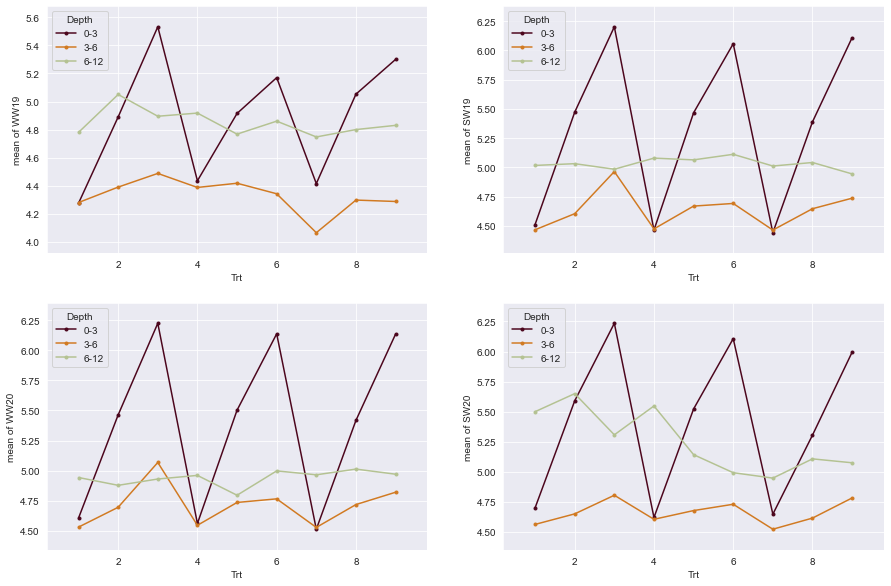

In [10]:
f , axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
sns.set_style("darkgrid")
fig1 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['WW19'], ax=axes[0,0],colors=['#4c061d','#d17a22', '#b4c292'])
fig2 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['SW19'],ax=axes[0,1], colors=['#4c061d','#d17a22', '#b4c292'])
fig3 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['WW20'],ax=axes[1,0], colors=['#4c061d','#d17a22', '#b4c292'])
fig4= interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['SW20'], ax=axes[1,1],colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

In [ ]:
The interaction plot helps to visualize the means of the response of the two factors (Treatment and Depth) on one graph. 
The X-axis have a factor of Treatment  with ,1,2,3,4,5,6,7,8,9 levels.

1.This profil plot above just shows 27 mean value of Ph Depth. 

2. Intresting, it also shows how treatment and Ph Depth affect the mean. The interaction effect means the effect of one factor depend upon other factor, which is shown by profil plot not running parallel.

3. Treatment affect Ph Depth 0-3 diffrently than ph depth 3-6 and ph depth 6-12.

4. Roughly, we see brown lines goes up and down.Since, Treatment varies with Depth 0-3. Also green line and orange line are straight.So, Treatment have almost same effect in Ph depth 3-6 and 6-12. 


Parallel lines: No interaction occurs.
Nonparallel lines: An interaction occurs. The more nonparallel the lines are, the greater the strength of the interaction.b

# Univariate analysis of Each Dependent variable of Time Series.

**First Table is for WW19**

**Second Table FOr SW19**

**Third Table For WW2020**

**Fourth table for SW20**

In [11]:
formula = 'WW19 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print('ANOVA TABLE FOR WINTER WHEAT 2019' )
print(aov_table.round(4))
print('/n')
formula = 'SW19 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print('ANOVA TABLE FOR SPRING WHEAT 2019')
print(aov_table.round(4))
print('/n')
formula = 'WW20 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print('ANOVA TABLE FOR 2019 Winter WHEAT 2020')
print(aov_table.round(4))

print('/n')
formula = 'SW20 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print('ANOVA TABLE FOR 2019 Spring WHEAT 2020')
print(aov_table.round(4))

ANOVA TABLE FOR WINTER WHEAT 2019
           sum_sq     df        F  PR(>F)
Depth      7.0273    2.0  38.3815  0.0000
Trt        0.0244    1.0   0.2664  0.6069
Trt:Depth  0.7517    2.0   4.1055  0.0193
Residual   9.3376  102.0      NaN     NaN
/n
ANOVA TABLE FOR SPRING WHEAT 2019
            sum_sq     df        F  PR(>F)
Depth       9.1286    2.0  24.9742  0.0000
Trt         0.4435    1.0   2.4268  0.1224
Trt:Depth   0.7549    2.0   2.0653  0.1320
Residual   18.6415  102.0      NaN     NaN
/n
ANOVA TABLE FOR 2019 Winter WHEAT 2020
            sum_sq     df        F  PR(>F)
Depth       8.4691    2.0  23.2183  0.0000
Trt         0.6034    1.0   3.3087  0.0719
Trt:Depth   0.6473    2.0   1.7745  0.1748
Residual   18.4203  101.0      NaN     NaN
/n
ANOVA TABLE FOR 2019 Spring WHEAT 2020
            sum_sq     df        F  PR(>F)
Depth      11.6878    2.0  21.0333  0.0000
Trt         0.1271    1.0   0.4574  0.5004
Trt:Depth   1.5519    2.0   2.7928  0.0660
Residual   28.0618  101.0      Na

**Dependent Variable WW19.**

DEPTH: We reject Null Hypothesis. From table we conclude that there is stastically significant different between the mean value of depth. I.E mean Ph value varies with respect to depth.

Treatment:We null Hypothesis we see that p value of treatment is 0.6069. I.E mean value of each treatment level are same.

Interaction effect. Interaction effect is significant between the Dependent variable.Because the interaction effect between Treatment and Depth is statistically significant, we cannot interpret the main effects without considering the interaction effect. Lets analysis interaction effect through profil plot. (Describe from above profil plot)

**Describe for other Dependent variable also**

Post-Hoc Comparisons, Depth

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0-3    3-6  -0.5589    0.0 -0.7328 -0.385   True
   0-3   6-12  -0.0375 0.8654 -0.2114 0.1364  False
   3-6   6-12   0.5214    0.0  0.3475 0.6953   True
---------------------------------------------------


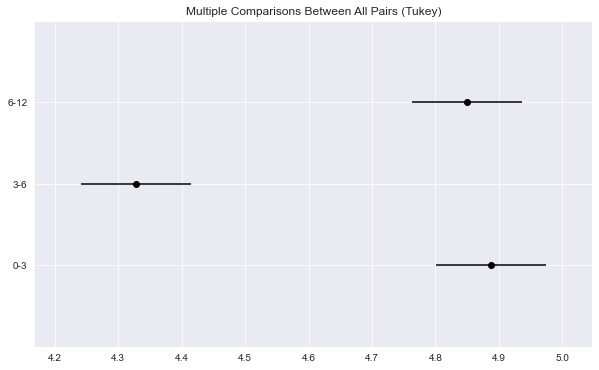

In [13]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary()) 

Post-Hoc Comparisons, Treatment

<AxesSubplot:xlabel='Trt', ylabel='WW19'>

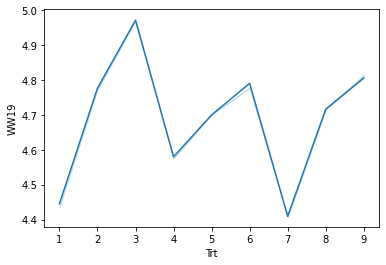

In [8]:
sns.lineplot(x='Trt', y='WW19', data=df,ci=True
             )


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.3317 0.4391 -0.1551  0.8185  False
     1      3   0.5267 0.0237  0.0399  1.0135   True
     1      4    0.135 0.9936 -0.3518  0.6218  False
     1      5    0.255 0.7681 -0.2318  0.7418  False
     1      6   0.3458 0.3806  -0.141  0.8326  False
     1      7  -0.0358    1.0 -0.5226   0.451  False
     1      8   0.2717 0.7015 -0.2151  0.7585  False
     1      9   0.3608 0.3228  -0.126  0.8476  False
     2      3    0.195 0.9375 -0.2918  0.6818  False
     2      4  -0.1967 0.9345 -0.6835  0.2901  False
     2      5  -0.0767 0.9999 -0.5635  0.4101  False
     2      6   0.0142    1.0 -0.4726   0.501  False
     2      7  -0.3675 0.2988 -0.8543  0.1193  False
     2      8    -0.06    1.0 -0.5468  0.4268  False
     2      9   0.0292    1.0 -0.4576   0.516  False
     3      4  -0.3917 0.2209 -0.8785  0.0951 

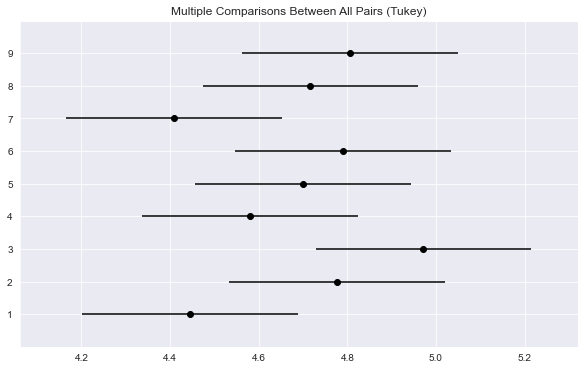

In [14]:
 tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

Post-Hoc Comparisons, Interaction

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 1_0-3  1_3-6    0.005    1.0 -0.5481  0.5581  False
 1_0-3 1_6-12    0.505 0.1234 -0.0481  1.0581  False
 1_0-3  2_0-3    0.615 0.0132  0.0619  1.1681   True
 1_0-3  2_3-6    0.115    1.0 -0.4381  0.6681  False
 1_0-3 2_6-12    0.775 0.0002  0.2219  1.3281   True
 1_0-3  3_0-3   1.2575    0.0  0.7044  1.8106   True
 1_0-3  3_3-6   0.2125 0.9993 -0.3406  0.7656  False
 1_0-3 3_6-12     0.62 0.0118  0.0669  1.1731   True
 1_0-3  4_0-3     0.16    1.0 -0.3931  0.7131  False
 1_0-3  4_3-6   0.1125    1.0 -0.4406  0.6656  False
 1_0-3 4_6-12   0.6425 0.0069  0.0894  1.1956   True
 1_0-3  5_0-3     0.64 0.0074  0.0869  1.1931   True
 1_0-3  5_3-6   0.1425    1.0 -0.4106  0.6956  False
 1_0-3 5_6-12   0.4925 0.1528 -0.0606  1.0456  False
 1_0-3  6_0-3    0.895    0.0  0.3419  1.4481   True
 1_0-3  6_3-6   0.0675    1.0 -0.4856  0.6206 

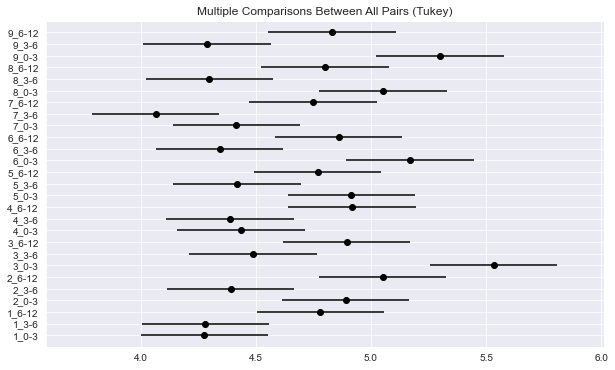

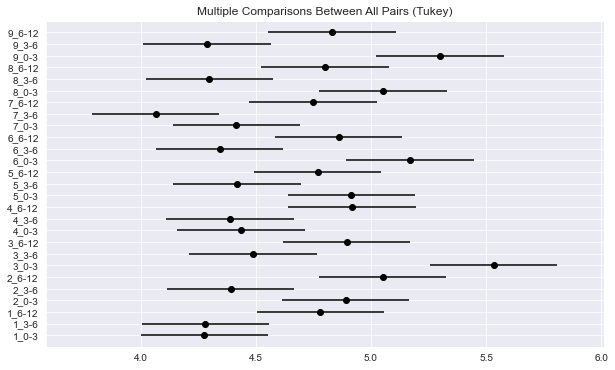

In [15]:
 df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['combine'],
 alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# 2.Dependent Variable SW19¶

**Post-Hoc Comparisons, Depth**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-3    3-6  -0.7106    0.0 -0.9541  -0.467   True
   0-3   6-12  -0.3142 0.0077 -0.5577 -0.0706   True
   3-6   6-12   0.3964 0.0006  0.1528    0.64   True
----------------------------------------------------


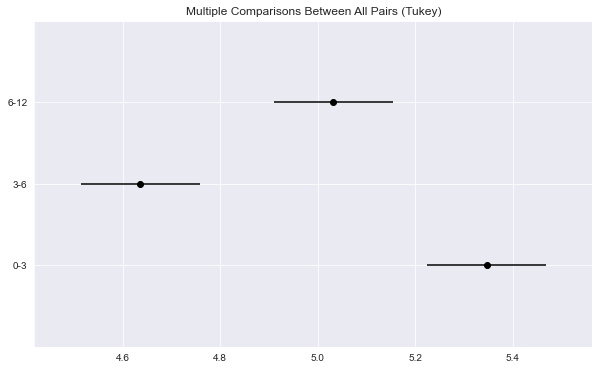

In [16]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['SW19'],
 groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Post-Hoc Comparisons, Treatment**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.3317 0.4391 -0.1551  0.8185  False
     1      3   0.5267 0.0237  0.0399  1.0135   True
     1      4    0.135 0.9936 -0.3518  0.6218  False
     1      5    0.255 0.7681 -0.2318  0.7418  False
     1      6   0.3458 0.3806  -0.141  0.8326  False
     1      7  -0.0358    1.0 -0.5226   0.451  False
     1      8   0.2717 0.7015 -0.2151  0.7585  False
     1      9   0.3608 0.3228  -0.126  0.8476  False
     2      3    0.195 0.9375 -0.2918  0.6818  False
     2      4  -0.1967 0.9345 -0.6835  0.2901  False
     2      5  -0.0767 0.9999 -0.5635  0.4101  False
     2      6   0.0142    1.0 -0.4726   0.501  False
     2      7  -0.3675 0.2988 -0.8543  0.1193  False
     2      8    -0.06    1.0 -0.5468  0.4268  False
     2      9   0.0292    1.0 -0.4576   0.516  False
     3      4  -0.3917 0.2209 -0.8785  0.0951 

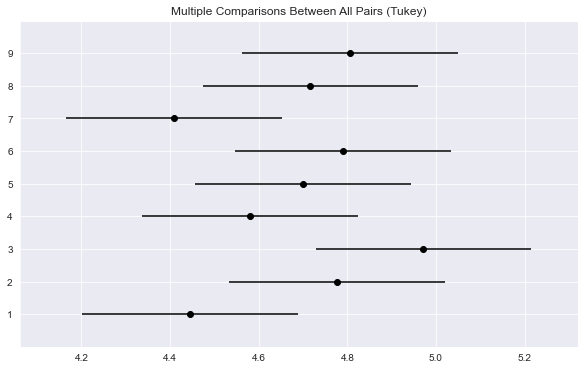

In [17]:
 tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary()) 

**Post-Hoc Comparisons, Interaction**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 1_0-3  1_3-6   -0.045    1.0 -0.5068  0.4168  False
 1_0-3 1_6-12    0.505 0.0166  0.0432  0.9668   True
 1_0-3  2_0-3     0.96    0.0  0.4982  1.4218   True
 1_0-3  2_3-6   0.0925    1.0 -0.3693  0.5543  False
 1_0-3 2_6-12     0.52  0.011  0.0582  0.9818   True
 1_0-3  3_0-3     1.69   -0.0  1.2282  2.1518   True
 1_0-3  3_3-6   0.4525 0.0623 -0.0093  0.9143  False
 1_0-3 3_6-12   0.4725 0.0385  0.0107  0.9343   True
 1_0-3  4_0-3  -0.0475    1.0 -0.5093  0.4143  False
 1_0-3  4_3-6  -0.0375    1.0 -0.4993  0.4243  False
 1_0-3 4_6-12   0.5675 0.0028  0.1057  1.0293   True
 1_0-3  5_0-3    0.955    0.0  0.4932  1.4168   True
 1_0-3  5_3-6   0.1575 0.9999 -0.3043  0.6193  False
 1_0-3 5_6-12   0.5525 0.0044  0.0907  1.0143   True
 1_0-3  6_0-3    1.545   -0.0  1.0832  2.0068   True
 1_0-3  6_3-6     0.18 0.9991 -0.2818  0.6418 

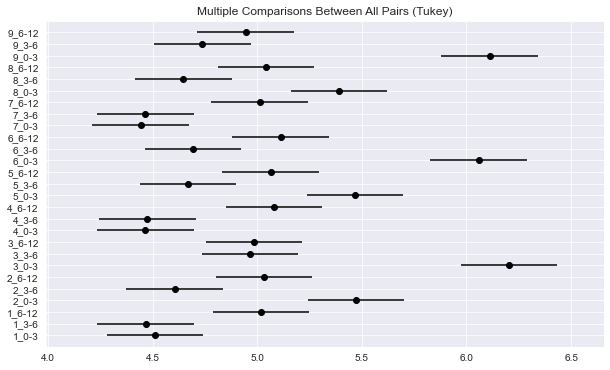

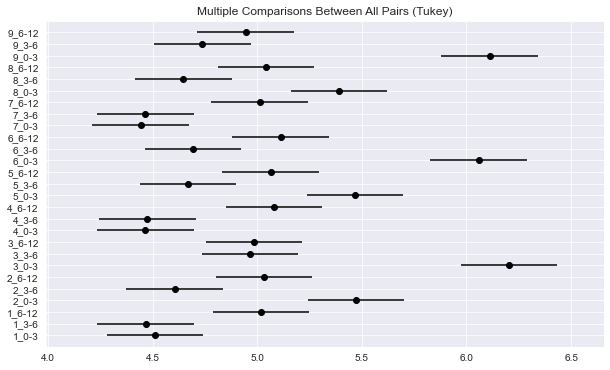

In [18]:
 df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['SW19'],
 groups=df['combine'],
 alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# 3.Dependent Variable WW20

**MULTIPLE Comparision is not possible due to missing DATA**
Post-Hoc Comparisons, Depth 

C:\Users\19292\AppData\Local\Programs\Common\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


ValueError: Axis limits cannot be NaN or Inf

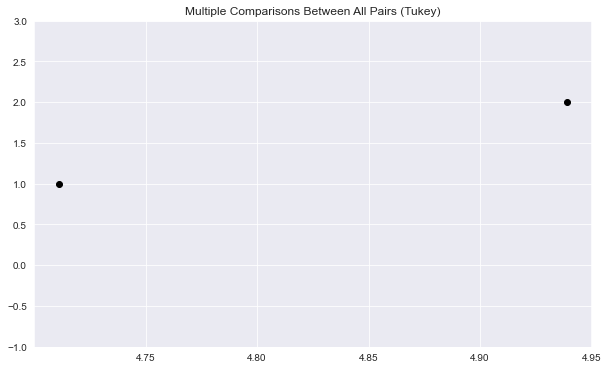

In [20]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW20'],
 groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

Similarly, Because of missing Data, we cannot do multiple comparision. 